### Importing All the Required Libraries

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.gridspec as gridspec
import warnings

from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score,plot_roc_curve



from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt  
from sklearn import  metrics


### Loading Dataset

In [146]:
surgery = pd.read_csv("ThoraricSurgery.csv")

In [147]:
surgery.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [148]:
surgery.tail()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F
469,470,DGN3,4.72,3.56,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F


#### To remove warnings 

In [149]:

warnings.filterwarnings('ignore')

### Descriptive statistics

In [150]:
surgery.describe()

,id,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,62.534043
std,135.821574,0.871395,11.767857,8.706902
min,1.000000,1.440000,0.960000,21.000000
25%,118.250000,2.600000,1.960000,57.000000
50%,235.500000,3.160000,2.400000,62.000000
75%,352.750000,3.807500,3.080000,69.000000
max,470.000000,6.300000,86.300000,87.000000


### Number of rows and columns

In [151]:
surgery.shape

(470, 18)

In [152]:
duplicate_rows = surgery[surgery.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 18)


### Understanding the data set

#### Description of the features in the dataset.

In [153]:
description = pd.read_excel('Thoracic surgery-description.xlsx').dropna()
description.style.set_properties(subset=['Description'])

,Attributes,Description
0,DGN,"Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)"
1,PRE4,Forced Vital Capacity - FVC (numeric)
2,PRE5,Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
3,PRE6,"Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)"
4,PRE7,"Pain before surgery (T,F)"
5,PRE8,"Haemoptysis before surgery (T,F)"
6,PRE9,"Dyspnoea before surgery (T,F)"
7,PRE10,"Cough before surgery (T,F)"
8,PRE11,"Weakness before surgery (T,F)"
9,PRE14,"T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)"


### Renaming the attributes of the dataset

In [154]:
col = ['ID','Diagnosis','Forced_Capacity','Forced_Expiration','Zubrod_scale','Pain','Haemoptysis','Dyspnoea',
       'Cough','Weakness','Size_of_tumor','Diabetes','MI_6months','PAD','Smoker','Asthmatic','Age','Risk_1year']
surgery.columns = col

In [155]:
surgery.head()

,ID,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1year
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


### Missing values

#### Checking the number of null values and data type of the variables present in the data set

In [156]:
surgery.isna().sum()

ID                   0
Diagnosis            0
Forced_Capacity      0
Forced_Expiration    0
Zubrod_scale         0
Pain                 0
Haemoptysis          0
Dyspnoea             0
Cough                0
Weakness             0
Size_of_tumor        0
Diabetes             0
MI_6months           0
PAD                  0
Smoker               0
Asthmatic            0
Age                  0
Risk_1year           0
dtype: int64

#### Changing the values of the categorical variables, to improve the interpretation

In [157]:
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN1'] = 'Diagnosis_1'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN2'] = 'Diagnosis_2'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN3'] = 'Diagnosis_3'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN4'] = 'Diagnosis_4'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN5'] = 'Diagnosis_5'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN6'] = 'Diagnosis_6'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN8'] = 'Diagnosis_8'

surgery['Zubrod_scale'][surgery['Zubrod_scale'] == 'PRZ0'] = 'Zubrod_scale_0'
surgery['Zubrod_scale'][surgery['Zubrod_scale'] == 'PRZ1'] = 'Zubrod_scale_1'
surgery['Zubrod_scale'][surgery['Zubrod_scale'] == 'PRZ2'] = 'Zubrod_scale_2'

surgery['Pain'][surgery['Pain'] == 'F'] = 'False'
surgery['Pain'][surgery['Pain'] == 'T'] = 'True'

surgery['Haemoptysis'][surgery['Haemoptysis'] == 'F'] = 'False'
surgery['Haemoptysis'][surgery['Haemoptysis'] == 'T'] = 'True'

surgery['Dyspnoea'][surgery['Dyspnoea'] == 'F'] = 'False'
surgery['Dyspnoea'][surgery['Dyspnoea'] == 'T'] = 'True'

surgery['Cough'][surgery['Cough'] == 'F'] = 'False'
surgery['Cough'][surgery['Cough'] == 'T'] = 'True'

surgery['Weakness'][surgery['Weakness'] == 'F'] = 'False'
surgery['Weakness'][surgery['Weakness'] == 'T'] = 'True'

surgery['Diabetes'][surgery['Diabetes'] == 'F'] = 'False'
surgery['Diabetes'][surgery['Diabetes'] == 'T'] = 'True'

surgery['MI_6months'][surgery['MI_6months'] == 'F'] = 'False'
surgery['MI_6months'][surgery['MI_6months'] == 'T'] = 'True'


surgery['PAD'][surgery['PAD'] == 'F'] = 'False'
surgery['PAD'][surgery['PAD'] == 'T'] = 'True'


surgery['Smoker'][surgery['Smoker'] == 'F'] = 'False'
surgery['Smoker'][surgery['Smoker'] == 'T'] = 'True'

surgery['Asthmatic'][surgery['Asthmatic'] == 'F'] = 'False'
surgery['Asthmatic'][surgery['Asthmatic'] == 'T'] = 'True'

surgery['Risk_1year'][surgery['Risk_1year'] == 'F'] = 'False'
surgery['Risk_1year'][surgery['Risk_1year'] == 'T'] = 'True'

In [158]:
surgery.head()

,ID,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1year
0,1,Diagnosis_2,2.88,2.16,Zubrod_scale_1,False,False,False,True,True,OC14,False,False,False,True,False,60,False
1,2,Diagnosis_3,3.40,1.88,Zubrod_scale_0,False,False,False,False,False,OC12,False,False,False,True,False,51,False
2,3,Diagnosis_3,2.76,2.08,Zubrod_scale_1,False,False,False,True,False,OC11,False,False,False,True,False,59,False
3,4,Diagnosis_3,3.68,3.04,Zubrod_scale_0,False,False,False,False,False,OC11,False,False,False,False,False,54,False
4,5,Diagnosis_3,2.44,0.96,Zubrod_scale_2,False,True,False,True,True,OC11,False,False,False,True,False,73,True


### Displaying  data present in the csv file

In [159]:
surgery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 470 non-null    int64  
 1   Diagnosis          470 non-null    object 
 2   Forced_Capacity    470 non-null    float64
 3   Forced_Expiration  470 non-null    float64
 4   Zubrod_scale       470 non-null    object 
 5   Pain               470 non-null    object 
 6   Haemoptysis        470 non-null    object 
 7   Dyspnoea           470 non-null    object 
 8   Cough              470 non-null    object 
 9   Weakness           470 non-null    object 
 10  Size_of_tumor      470 non-null    object 
 11  Diabetes           470 non-null    object 
 12  MI_6months         470 non-null    object 
 13  PAD                470 non-null    object 
 14  Smoker             470 non-null    object 
 15  Asthmatic          470 non-null    object 
 16  Age                470 non

### Checking the data types

In [160]:
surgery.dtypes

ID                     int64
Diagnosis             object
Forced_Capacity      float64
Forced_Expiration    float64
Zubrod_scale          object
Pain                  object
Haemoptysis           object
Dyspnoea              object
Cough                 object
Weakness              object
Size_of_tumor         object
Diabetes              object
MI_6months            object
PAD                   object
Smoker                object
Asthmatic             object
Age                    int64
Risk_1year            object
dtype: object

### Finding number of unique values in each feature

In [161]:
surgery.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

ID     470
Age     45
dtype: int64

In [162]:
surgery.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

Forced_Capacity      134
Forced_Expiration    136
dtype: int64

In [163]:
surgery.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Diagnosis        7
Zubrod_scale     3
Pain             2
Haemoptysis      2
Dyspnoea         2
Cough            2
Weakness         2
Size_of_tumor    4
Diabetes         2
MI_6months       2
PAD              2
Smoker           2
Asthmatic        2
Risk_1year       2
dtype: int64

## Visualizations
#### Categorical Features

Categorical features are present in dataset:

1. Diagnosis
2. Zubrod_scale
3. Pain
4. Haemoptysis
5. Dyspnoea
6. Cough
7. Weakness
8. Size_of_tumor
9. Diabetes
10. MI_6months
11. PAD
12. Smoker
13. Asthmatic

#### Continuos Features
1. Forced_Capacity
2. Forced_Expiration
3. Age 


`Target Feature: Risk_1year`

#### Visualization of Categorical Features

In [164]:
#List to store column names of categorical features
cat_features=['Diagnosis','Zubrod_scale','Pain','Haemoptysis','Dyspnoea','Cough','Weakness','Size_of_tumor','Diabetes','MI_6months','PAD','Smoker','Asthmatic']
surgery.head()

,ID,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1year
0,1,Diagnosis_2,2.88,2.16,Zubrod_scale_1,False,False,False,True,True,OC14,False,False,False,True,False,60,False
1,2,Diagnosis_3,3.40,1.88,Zubrod_scale_0,False,False,False,False,False,OC12,False,False,False,True,False,51,False
2,3,Diagnosis_3,2.76,2.08,Zubrod_scale_1,False,False,False,True,False,OC11,False,False,False,True,False,59,False
3,4,Diagnosis_3,3.68,3.04,Zubrod_scale_0,False,False,False,False,False,OC11,False,False,False,False,False,54,False
4,5,Diagnosis_3,2.44,0.96,Zubrod_scale_2,False,True,False,True,True,OC11,False,False,False,True,False,73,True


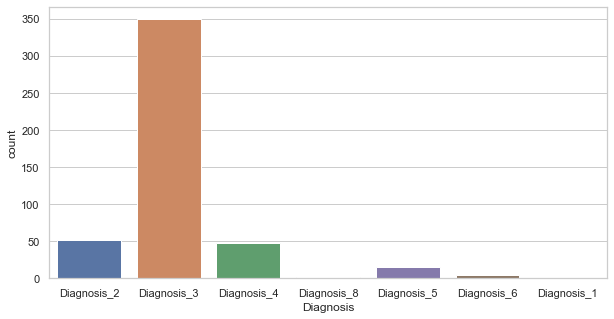

In [165]:
plt.figure(figsize=(10,5))
sns.countplot(x='Diagnosis',data=surgery)

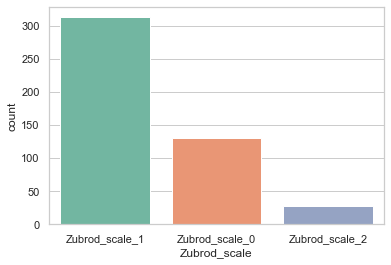

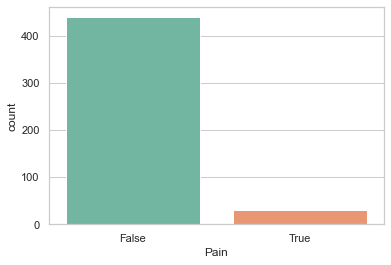

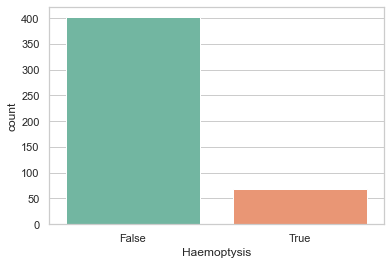

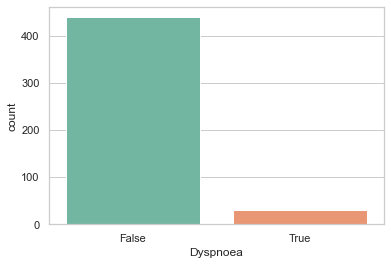

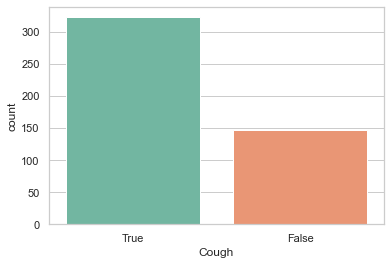

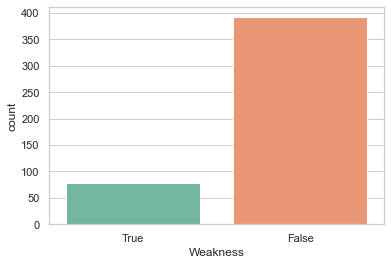

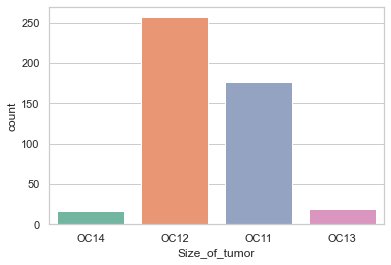

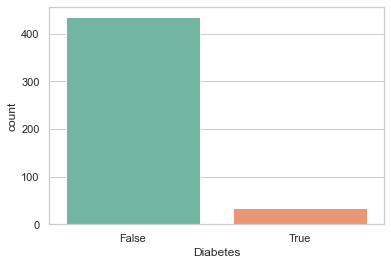

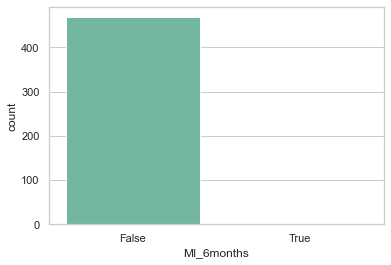

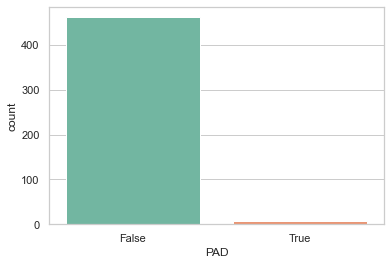

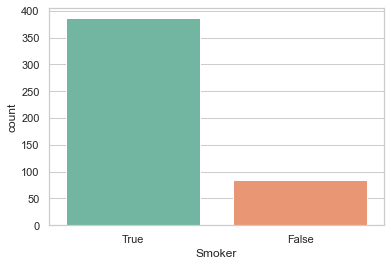

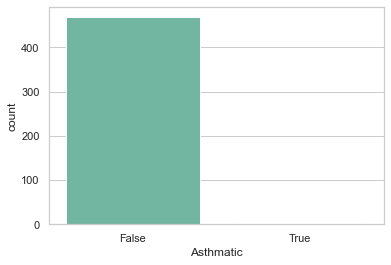

In [166]:
sns.set(style="whitegrid")
for i,cat in enumerate(cat_features[1:]):
    plt.figure(i)
    sns.countplot(x=cat,data=surgery,palette="Set2")

### Distribution of Continuous Feature. 

In [167]:
cont_features=['Forced_Capacity','Forced_Expiration','Age']

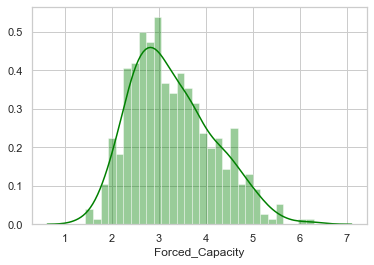

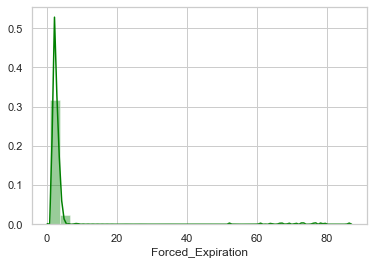

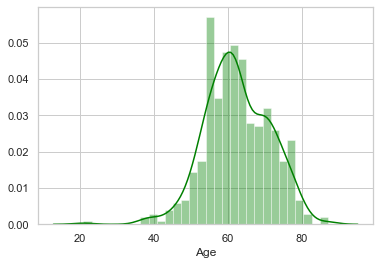

In [168]:
sns.set(style="whitegrid")
for i,cont in enumerate(cont_features):
    plt.figure(i)
    sns.distplot(surgery[cont],hist=True,bins=30,color="green")

### Relationship between Continuous features

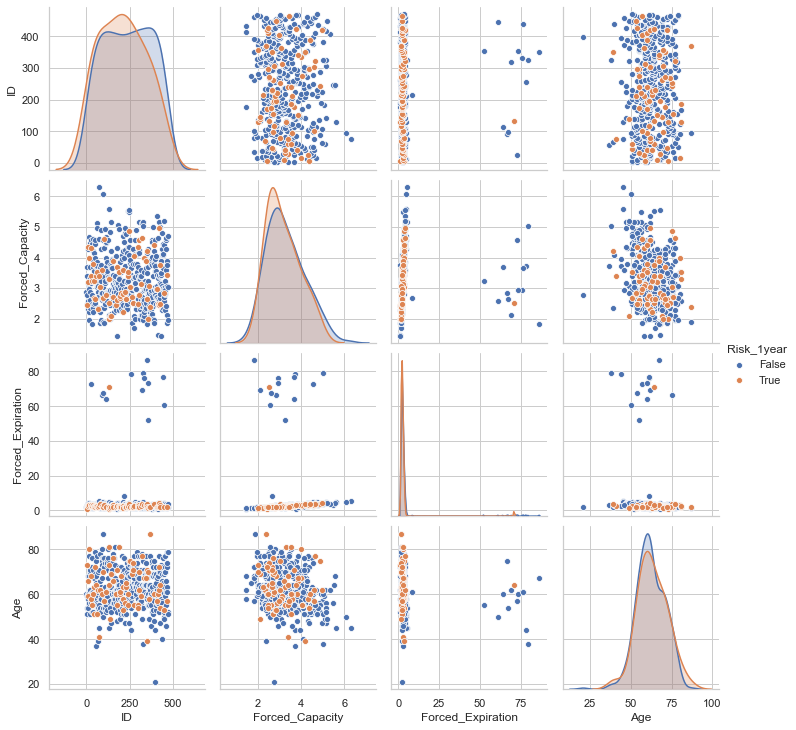

In [169]:
sns.pairplot(surgery,hue='Risk_1year' )

#### Box Plot to detect outliers in continuous features

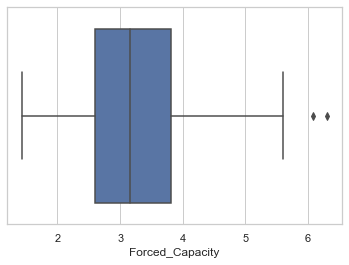

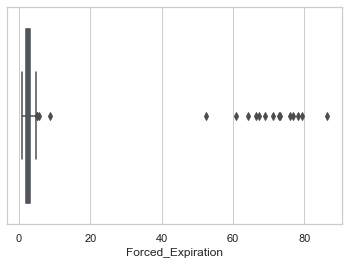

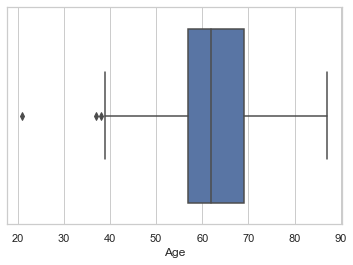

In [170]:
for i,cont in enumerate(cont_features):
    plt.figure(i)
    ax=sns.boxplot(x=cont,data=surgery)
    ax.plot

**Above Box plots depict there are outliers in all 3 continuous features. We can use different techniques to handle outliers.**

- Clamp Transformation can be used and check can be placed if it does not impact overall distribution.
- We can use standard Normalization of data betwen -1 and 1
- Binning

We can select the best approach after checking the impact on distribution after applying above 3 techniques.

## Distrbution of target feature

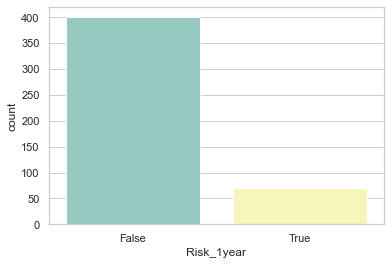

In [171]:
sns.countplot(x='Risk_1year',data=surgery,palette="Set3")

### There is huge gap in distribution of two levels in target feature. We can use "Over Sampling" Techniques to generate synthetic data for "True" Minority class.

#### Visualizing continuous and categorical features with target variable

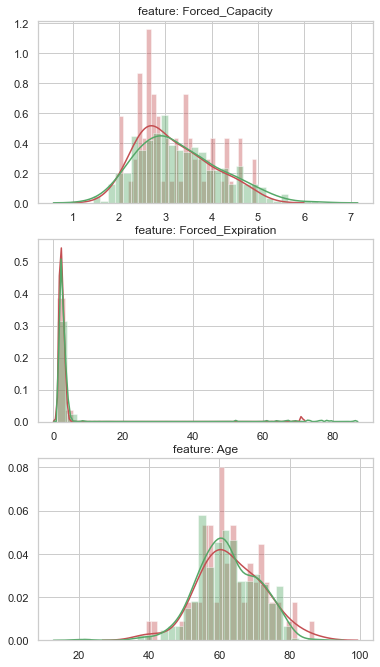

In [172]:
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(cont_features):
    ax = plt.subplot(gs[i])
    sns.distplot(surgery[col][surgery.Risk_1year == 'True'], bins=30, color='r')
    sns.distplot(surgery[col][surgery.Risk_1year == 'False'], bins=30, color='g')
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(col))
plt.show()

In [173]:
#Convert categorical features to numeric
surgery[['Pain','Haemoptysis','Dyspnoea','Cough','Weakness','Diabetes','MI_6months','PAD','Smoker','Asthmatic','Risk_1year']] = \
(surgery[['Pain','Haemoptysis','Dyspnoea','Cough','Weakness','Diabetes','MI_6months','PAD','Smoker','Asthmatic','Risk_1year']] == 'True').astype(int)


In [174]:
surgery['Diagnosis']= surgery['Diagnosis'].str[-1:].astype(int)
surgery['Zubrod_scale']= surgery['Zubrod_scale'].str[-1:].astype(int)
surgery['Size_of_tumor']= surgery['Size_of_tumor'].str[-1:].astype(int)

In [175]:
surgery.head()

,ID,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1year
0,1,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,2,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,4,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,5,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


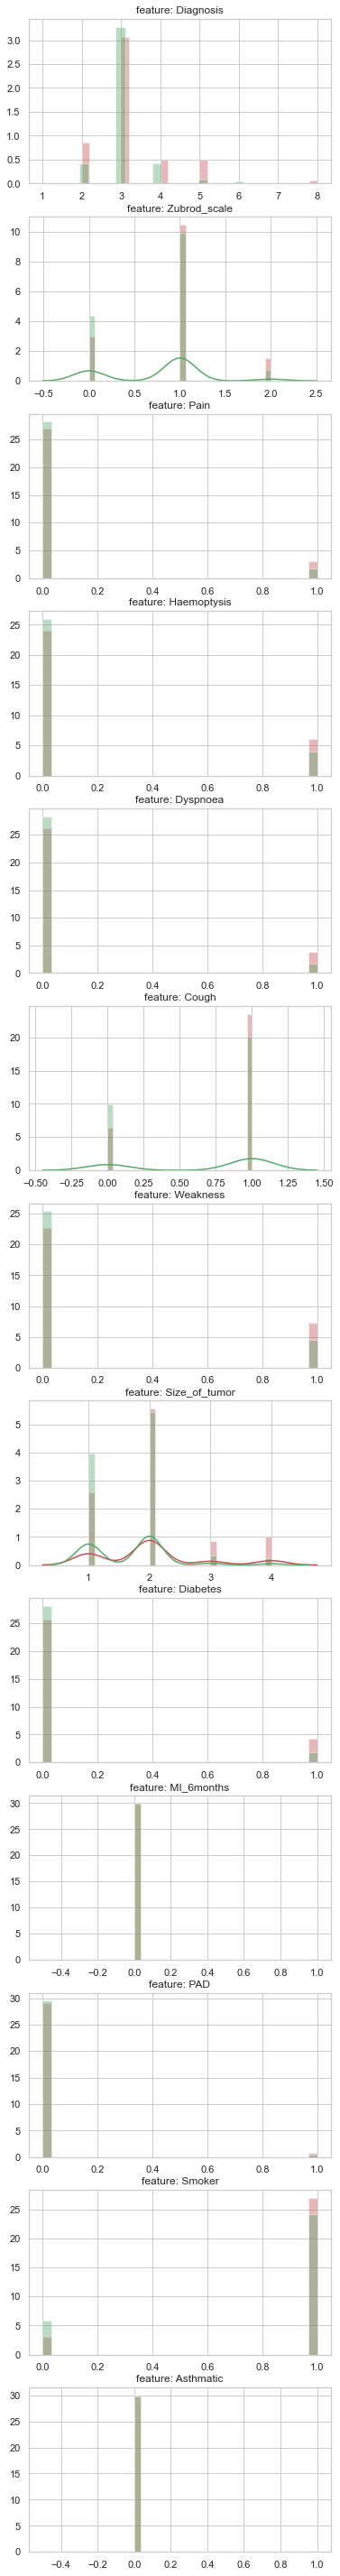

In [176]:
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(cat_features):
    ax = plt.subplot(gs[i])
    sns.distplot(surgery[col][surgery.Risk_1year == 1], bins=30, color='r')
    sns.distplot(surgery[col][surgery.Risk_1year == 0], bins=30, color='g')
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(col))
plt.show()

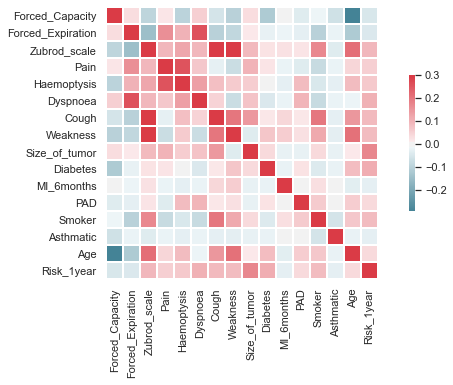

In [177]:
# Compute the correlation matrix
corr=surgery.iloc[:,2:].corr()

f, ax = plt.subplots(figsize=(11, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Random Forest

In [178]:
surgery.head()

,ID,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1year
0,1,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,2,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,4,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,5,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [179]:
surgery[['Risk_1year']]

,Risk_1year
0,0
1,0
2,0
3,0
4,1
...,...
465,0
466,0
467,0
468,0


In [180]:

X=surgery.iloc[:,1:-1]
Y=surgery[['Risk_1year']]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42) # 80% training and 20% test


In [181]:
model_rnf = RandomForestClassifier(n_estimators=10,random_state=42 )
model_rnf.fit(X_train, y_train)

y_pred_rnf = model_rnf.predict(X_test)

In [182]:
model_rnf.score(X_test,y_test)

0.7978723404255319

In [183]:
print(classification_report(y_test, y_pred_rnf))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89        75
           1       0.50      0.05      0.10        19

    accuracy                           0.80        94
   macro avg       0.65      0.52      0.49        94
weighted avg       0.74      0.80      0.73        94



### Using feature importance for Random forest

In [184]:

feature_imp = pd.Series(model_rnf.feature_importances_).sort_values(ascending=False)
feature_imp

1     0.226615
2     0.218834
15    0.168681
0     0.091373
9     0.084579
5     0.031406
6     0.029480
3     0.025860
7     0.025372
8     0.025060
10    0.022487
13    0.019672
4     0.019148
12    0.011429
11    0.000005
14    0.000000
dtype: float64

<BarContainer object of 16 artists>

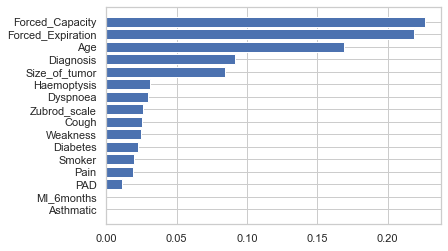

In [185]:
#Visualization for important features
sorted_col = model_rnf.feature_importances_.argsort()
plt.barh(X.columns[sorted_col], model_rnf.feature_importances_[sorted_col])

### Removing least important features fo Random Forest

In [186]:
X_new=X[['Forced_Capacity','Forced_Expiration','Age','Diagnosis','Size_of_tumor','Haemoptysis','Dyspnoea','Zubrod_scale','Cough','Weakness','Diabetes']]

In [187]:
# Split dataset into training set and test set
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_new, Y, test_size=0.2,random_state=42) # 80% training and 20% test
 
sm=SMOTE(random_state = 42)
X_train_smo, y_train_smo = sm.fit_sample(X_train_ft, y_train_ft) 

In [188]:
model_rnf_ft = RandomForestClassifier(n_estimators=10,random_state=42)
model_rnf_ft.fit(X_train_smo, y_train_smo)

y_pred_rnf_ft = model_rnf_ft.predict(X_test_ft)

In [189]:

cmf_ft=confusion_matrix(y_test_ft,y_pred_rnf_ft)
cmf_ft

array([[71,  4],
       [18,  1]], dtype=int64)

In [190]:
model_rnf_ft.score(X_test_ft,y_test_ft)

0.7659574468085106

In [191]:
roc_auc_score(y_test, y_pred_rnf_ft)

0.49964912280701756

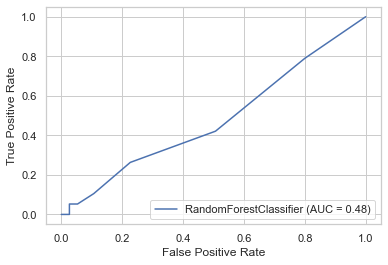

In [192]:
plot_roc_curve(model_rnf_ft, X_test_ft, y_test)  
plt.show() 

In [193]:
print(classification_report(y_test_ft, y_pred_rnf_ft))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        75
           1       0.20      0.05      0.08        19

    accuracy                           0.77        94
   macro avg       0.50      0.50      0.47        94
weighted avg       0.68      0.77      0.71        94



### Data Scaling 

Some columns like Diagnosis,Forced_Capacity,Forced_Expiration etc. are not scaled with remaining columns. Hence, performed min-max normalization on these features.

In [194]:
surgery['Diagnosis']= preprocessing.MinMaxScaler().fit_transform(surgery[['Diagnosis']])
surgery['Forced_Capacity']= preprocessing.MinMaxScaler().fit_transform(surgery[['Forced_Capacity']])
surgery['Forced_Expiration']= preprocessing.MinMaxScaler().fit_transform(surgery[['Forced_Expiration']])
surgery['Zubrod_scale']= preprocessing.MinMaxScaler().fit_transform(surgery[['Zubrod_scale']])
surgery['Size_of_tumor']= preprocessing.MinMaxScaler().fit_transform(surgery[['Size_of_tumor']])
surgery['Age']= preprocessing.MinMaxScaler().fit_transform(surgery[['Age']])

In [195]:
X=surgery.iloc[:,1:-1]

Y=surgery[['Risk_1year']]

# Modeling and Evaluation

In [196]:
#parameters to fine tune the models
knn_params = {'n_neighbors': list(range(2, 6, 1)),'weights':['uniform','distance'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
svc_params = {'C': [0.01, 0.7, 0.9, 1,10,100], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
dec_tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2, 6, 1)), 'min_samples_leaf': list(range(5, 8, 1))}
log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]}
nb_params= {'var_smoothing' : [0.00001,0.0000001]}
rf_params={'criterion': ['gini', "entropy"],'max_depth': list(range(2, 6, 1)), 'min_samples_leaf': list(range(5, 8, 1))}


# different classifiers we want to try for the problem 
classifiers = {
    
    "KNearest": (KNeighborsClassifier(), knn_params),
    "Support Vector Classifier": (SVC(), svc_params),
    "DecisionTreeClassifier": (DecisionTreeClassifier(), dec_tree_params),
    "Naive Bayes": (GaussianNB(), nb_params),
    "Random forests": (RandomForestClassifier(),rf_params),
    "LogisiticRegression": (LogisticRegression(), log_reg_params)
}

#Selecting candidate parameters using gridsearch to train the model
def get_best_fit(model, params, X, Y):
    grid = GridSearchCV(estimator=model, param_grid=params)
    grid.fit(X, Y)
    return grid.best_estimator_

# Algorithm to train all models
# We have implemented stratified k-fold cross validation approach and split the dataset into k equal folds
# The model is trained using (k-1) of the folds as training data and the remaining one as test data
# Parameters in function to perform various oversampling and undersampling on training data.
def train_all_models(X, Y,smote_tech=None,knn_smote=0,folds=5):
    RANDOM_SEED = 0
    for clf_name, (clf, params) in classifiers.items():
        skf = StratifiedKFold(n_splits=folds, random_state=RANDOM_SEED, shuffle=True)
        cv_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        estimators = []
        roc_auc_scores=[]
        for train_index, test_index in skf.split(X, Y):
            X_train, X_test = pd.DataFrame(data=X, index=train_index), pd.DataFrame(data=X, index=test_index)
            y_train, y_test = pd.DataFrame(data=Y, index=train_index), pd.DataFrame(data=Y, index=test_index)
            if smote_tech:
                #Over Sampling  before validation
                if knn_smote==1:
                    sm=KMeansSMOTE(kmeans_estimator=1, random_state = 42)
                elif knn_smote==2: #For near miss algorithm
                    sm=NearMiss()
                else:
                    sm = smote_tech(random_state = 42) 
                X_train_smo, y_train_smo = sm.fit_sample(X_train, y_train) 
            else:
                X_train_smo, y_train_smo=X_train,y_train
            model= get_best_fit(clf, params, X_train_smo, y_train_smo)
            estimators.append(model) 
            scores = cross_val_score(model, X_train_smo, y_train_smo.values.ravel(), cv=3, scoring='accuracy')  #compute the score 3 consecutive times
            cv_scores.append(scores)     
            y_pred = model.predict(X_test)
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))
            roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        print('============================= {} ============================='.format(clf_name))
        print('Accuracy score:\n', accuracy_score(y_test, y_pred))
        print()
        print('Confusion matrix:\n', confusion_matrix(y_test, y_pred)) 
        print()
        print('Classification report:\n', classification_report(y_test, y_pred))
        print()
        print('Mean cross validation score: {}'.format(np.array([cv_scores]).mean()))
        print('Mean precision score: {}'.format(np.array([precision_scores]).mean()))
        print('Mean Recall score: {}'.format(np.array([recall_scores]).mean()))
        print('Mean F1 score: {}'.format(np.array([f1_scores]).mean()))
        print('Mean AUC score: {}'.format(np.array([roc_auc_scores]).mean()))
        best_iteration = recall_scores.index(max(recall_scores))
        best_estimator = estimators[best_iteration]
        print('Best estimator: {}'.format(estimators[best_iteration]))
    print('=================================================================')

In [197]:
print("Models without handling imbalanced dataset")
train_all_models(X, Y)

Models without handling imbalanced dataset
============================= KNearest =============================
Accuracy score:
 0.851063829787234

Confusion matrix:
 [[80  0]
 [14  0]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        80
           1       0.00      0.00      0.00        14

    accuracy                           0.85        94
   macro avg       0.43      0.50      0.46        94
weighted avg       0.72      0.85      0.78        94


Mean cross validation score: 0.8446814814814816
Mean precision score: 0.0
Mean Recall score: 0.0
Mean F1 score: 0.0
Mean AUC score: 0.49874999999999997
Best estimator: KNeighborsClassifier(n_neighbors=4)
============================= Support Vector Classifier =============================
Accuracy score:
 0.851063829787234

Confusion matrix:
 [[80  0]
 [14  0]]

Classification report:
               precision    recall  f1-score   support

           0     

## Modeling and Evaluation using different oversampling as target feature is imbalanced

In [198]:
print("Over Sampling Technique using :SMOTE")
train_all_models(X, Y,SMOTE)
print("Over Sampling Technique using :Adaptive Synthetic Sampling")
train_all_models(X,Y,ADASYN)
print("Over Sampling Technique using :Borderline-SMOTE SVM")
train_all_models(X,Y,SVMSMOTE)
print("Over Sampling Technique using :Borderline-SMOTE")
train_all_models(X,Y,BorderlineSMOTE)
print("Over Sampling Technique using :Kmeans SMOTE")
train_all_models(X,Y,KMeansSMOTE,1) 
print("Over Sampling Technique using :Random Oversampling")
train_all_models(X,Y,RandomOverSampler)

Over Sampling Technique using :SMOTE
============================= KNearest =============================
Accuracy score:
 0.6914893617021277

Confusion matrix:
 [[62 18]
 [11  3]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81        80
           1       0.14      0.21      0.17        14

    accuracy                           0.69        94
   macro avg       0.50      0.49      0.49        94
weighted avg       0.74      0.69      0.72        94


Mean cross validation score: 0.7946777236628493
Mean precision score: 0.1933095238095238
Mean Recall score: 0.2857142857142857
Mean F1 score: 0.22509319908334685
Mean AUC score: 0.5278571428571428
Best estimator: KNeighborsClassifier(n_neighbors=3, weights='distance')
============================= Support Vector Classifier =============================
Accuracy score:
 0.5212765957446809

Confusion matrix:
 [[44 36]
 [ 9  5]]

Classification report:
            

##  Even though without oversampling we were getting better accuracy(85%) but it did not handle imbalanced dataset and model will eventually fail in generalizing. Hence, there is a need to handle this issue. 

### Undersampling Using Near Miss algorithm

In [199]:
# Checking performance using undersampling
from imblearn.under_sampling import NearMiss 


In [200]:
print("Under Sampling Technique using :Near Miss")
train_all_models(X, Y,NearMiss,2)

Under Sampling Technique using :Near Miss
============================= KNearest =============================
Accuracy score:
 0.3723404255319149

Confusion matrix:
 [[22 58]
 [ 1 13]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.28      0.43        80
           1       0.18      0.93      0.31        14

    accuracy                           0.37        94
   macro avg       0.57      0.60      0.37        94
weighted avg       0.84      0.37      0.41        94


Mean cross validation score: 0.6611190137505927
Mean precision score: 0.16331524500538583
Mean Recall score: 0.5714285714285714
Mean F1 score: 0.25163198651757607
Mean AUC score: 0.5369642857142857
Best estimator: KNeighborsClassifier(n_neighbors=2, weights='distance')
============================= Support Vector Classifier =============================
Accuracy score:
 0.3617021276595745

Confusion matrix:
 [[23 57]
 [ 3 11]]

Classification report:
      

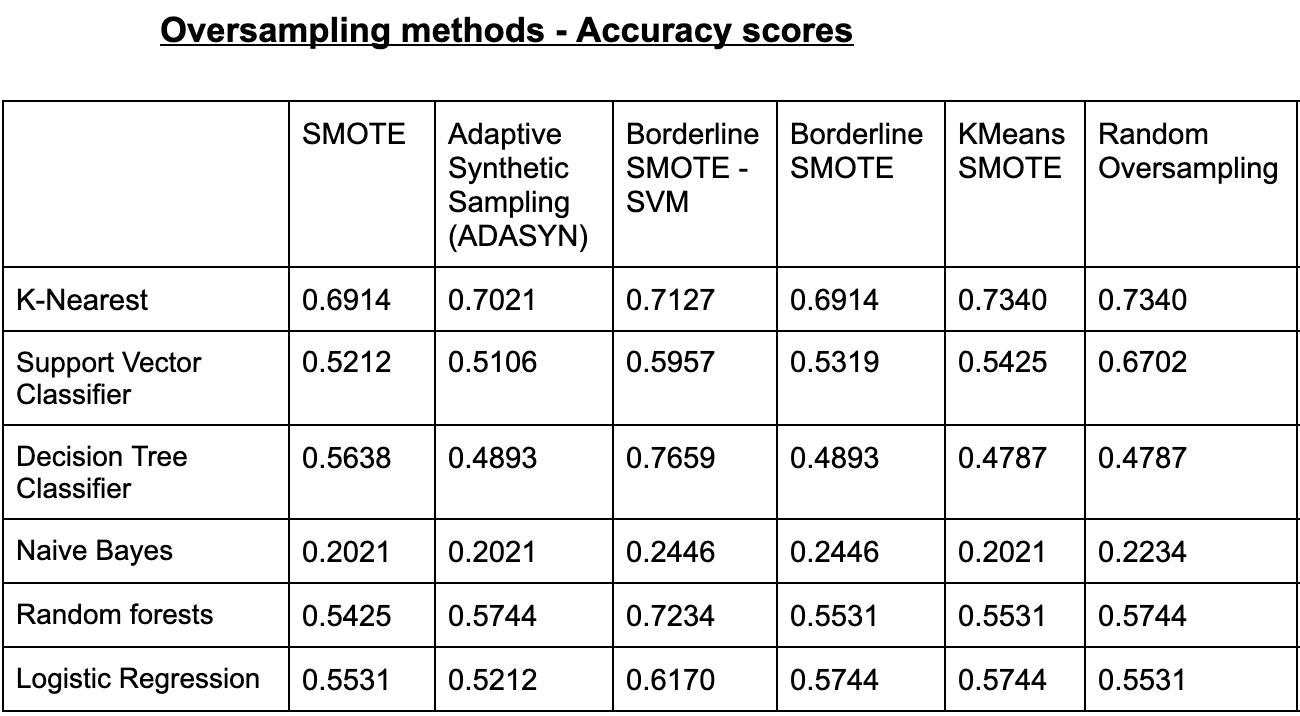

## KNN with random OverSampling comes or KMEANS SMOTE ?? discuss 

### Using KNN model to plot confusion matrix , Precision Recall curves, ROC curve

In [201]:
# Split dataset into training set and test set for KNN best estimator
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42) # 80% training and 20% test

In [202]:
ran_smote = RandomOverSampler(random_state = 42) 

X_train_smo, y_train_smo = ran_smote.fit_sample(X_train, y_train)

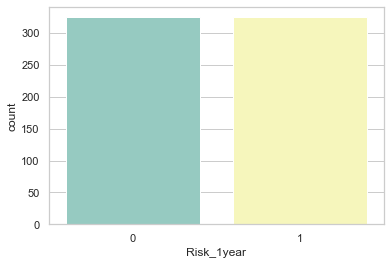

In [203]:
#Visualization of target feature after over sampling of training dataset
sns.countplot(x='Risk_1year',data=y_train_smo,palette="Set3")

In [204]:
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train_smo, y_train_smo)

y_pred_knn = model_knn.predict(X_test)

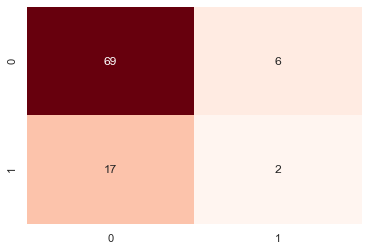

In [205]:
cmf_ft=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cmf_ft,annot=True,cbar=False,cmap='Reds')

In [206]:


roc_auc_score(y_test, y_pred_knn)


0.5126315789473683

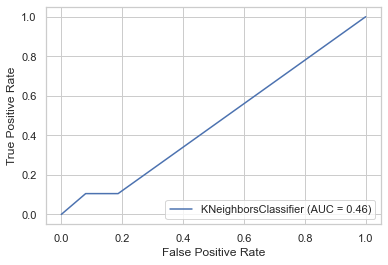

In [207]:
plot_roc_curve(model_knn, X_test, y_test)  
plt.show() 

## Creating an Ensemble model using Random Forest, SVM and KNN using best parameters 

In [208]:
model_rf = RandomForestClassifier(max_depth=5, min_samples_leaf=5,random_state=2)
model_rf.fit(X_train_smo, y_train_smo)

y_pred_rf = model_rf.predict(X_test)

In [209]:
model_svm=SVC(C=100, kernel='poly')
model_svm.fit(X_train_smo, y_train_smo)

y_pred_svm = model_svm.predict(X_test)

In [210]:

ensmb_model = VotingClassifier(estimators=[('rf', model_rf), ('knn', model_knn), ('svc', model_svm)],
                        voting='hard',weights=[1, 3, 2])


In [211]:
ensmb_model.fit(X_train_smo, y_train_smo)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=5,
                                                     min_samples_leaf=5,
                                                     random_state=2)),
                             ('knn', KNeighborsClassifier(n_neighbors=2)),
                             ('svc', SVC(C=100, kernel='poly'))],
                 weights=[1, 3, 2])

In [212]:
y_pred_ensmb = ensmb_model.predict(X_test)

In [213]:
accuracy_score(y_test, y_pred_ensmb)

0.7659574468085106

In [214]:
confusion_matrix(y_test,y_pred_ensmb)

array([[71,  4],
       [18,  1]], dtype=int64)

In [215]:
print('Classification report:\n', classification_report(y_test, y_pred_ensmb))

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        75
           1       0.20      0.05      0.08        19

    accuracy                           0.77        94
   macro avg       0.50      0.50      0.47        94
weighted avg       0.68      0.77      0.71        94



In [216]:
print('Classification report:\n', classification_report(y_test, y_pred_knn))

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        75
           1       0.25      0.11      0.15        19

    accuracy                           0.76        94
   macro avg       0.53      0.51      0.50        94
weighted avg       0.69      0.76      0.71        94



In [217]:
roc_auc_score(y_test, y_pred_ensmb)


0.49964912280701756

## Summary, after applying different techniques, "KNN with Random Oversampling" turned out to be balanced model for our dataset. Ensemble increased performance by 1% but overall recall and precision went down.

## KNN with Random OverSampling has: accuracy: 76%, Cross Validation Score=90% and AUC=51%